# Illustration: Hollow plate RVE 
## Problem definition
In this part, we are trying to show how the developed RVE simulator works by a simple RVE case called hollow plate RVE. 

> The shematic of the RVE is given by 

<center><img src="hollow_plate_rve_schematic.png" width="300"></center>

<center> Fig.schematics of the hollow plate RVE  </center>

<br />

> **Geometry parameters to describe the RVE**
1. length: $L$, width: $W$. Usually, $L=W$; therefore, we only use one parameter (size) to define the shape of RVE 
2. radius: $R$, which is the radius of the plate inside the square 

> **Other parameters for simulation** 
1. Material parameters: 
- Young;s modulus, the default value is $100 \mathrm{Mpa}$
- Poission ratio , the default value is $0.3$ 

2. Loading: 
- $ [ E_{xx}, E_{yy}, E_{xy} ]$ 

3. Mesh:
- mesh portion: divisions of every edges when meshing 

# Realization

In [1]:
# import packages 
import f3dasm
from matplotlib import pyplot as plt

from rvesimulator.cases.hollow_plate_rve import NaiveHollowPlate


2023-04-03 19:23:26,118 - Imported f3dasm
2023-04-03 19:23:27.528014: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-03 19:23:27.570002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 19:23:28.292837: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 19:23:28,919 - None



f3dasm:
       f3dasm: No __version__ attribute!

System:
    python: 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
executable: /home/jiaxiangyi/anaconda3/envs/f3dasm_env/bin/python
   machine: Linux-5.19.0-38-generic-x86_64-with-glibc2.35

Core package dependencies:
        numpy: 1.23.1
        scipy: 1.9.0
       pandas: 1.4.3
   matplotlib: 3.5.2
       pathos: 0.3.0
        hydra: 1.3.2
     autograd: No __version__ attribute!

Machine learning extension:
   tensorflow: 2.12.0

Optimization extension:
       GPyOpt: 1.2.6
          GPy: 1.10.0
   tensorflow: 2.12.0
        pygmo: 2.19.0

Sampling extension:
        SALib: 1.4.5


In [3]:
simulator = NaiveHollowPlate()
simulator.update_sim_info(strain=[0.05, 0.05, 0.05], print_info=True)

Simulation information: 

{
    "job_name": "hollowplate",
    "radius": 0.2,
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "mesh_portion": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "num_cpu": 1,
    "platform": "ubuntu"
}


## **First way of running simulation**

In [9]:
# supposed the radius and size of rve are the design variables, and we want to retrive all outputs from abaqus simulation 
samples = {'radius': 0.2, 'size':1.0} 
result = simulator.run_simulation(sample=samples, third_folder_index=0)

/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.003792 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.


In [11]:
result.keys() 

dict_keys(['total_time', 'strain', 'norm_stress', 'jacobian', 'gradient', 'total_vol', 'stress', 'plastic_energy'])

In [2]:
# create the doe
num_samples  = 2  # number of samples

# define the doe
radius = f3dasm.ContinuousParameter(
    name="radius", lower_bound=0.1, upper_bound=0.4
)
size = f3dasm.ContinuousParameter(
    name="size", lower_bound=1.0, upper_bound=1.5
)
# define the output
stress = f3dasm.ContinuousParameter(name="stress")
strain = f3dasm.ContinuousParameter(name="strain")

design = f3dasm.DesignSpace(
    input_space=[radius, size], output_space=[stress, strain]
)

sampler = f3dasm.sampling.LatinHypercube(design=design, seed=1)
data = sampler.get_samples(numsamples=num_samples)
print(data.data)

      input           output       
     radius      size stress strain
0  0.162553  1.325583    NaN    NaN
1  0.250017  1.180081    NaN    NaN


In [4]:
results = simulator.run_f3dasm(data=data)

/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.001326 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.005024 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.


In [5]:
print(results.data)

      input                                                       output  \
     radius      size                                             stress   
0  0.162553  1.325583  [[[0.0, 0.0], [0.0, 0.0]], [[0.853524012391832...   
1  0.250017  1.180081  [[[0.0, 0.0], [0.0, 0.0]], [[0.705560575998447...   

                                                      
                                              strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.005024999887123...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.005024999887123...  


[Text(0.5, 0, '$\\epsilon_{xy}$'), Text(0, 0.5, '$\\sigma_{xy}$ (MPa)')]

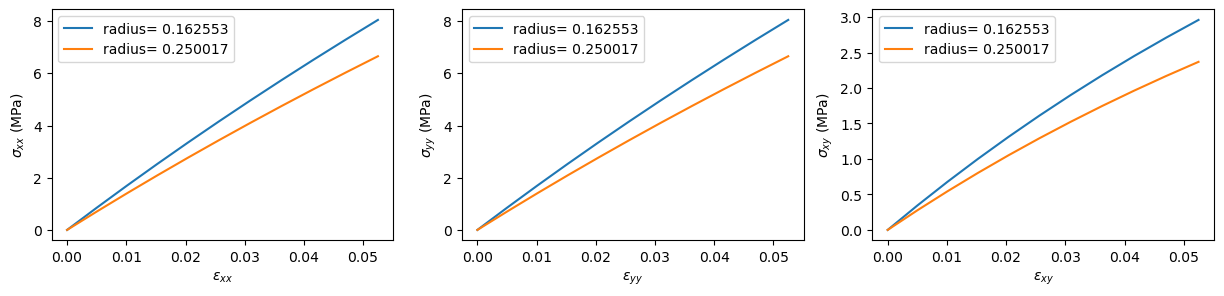

In [8]:
responses = results.data['output']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
ax[0].plot(
    responses["strain"][0][:, 0, 0],
    responses["stress"][0][:, 0, 0],
    label=f'radius= {results.data["input"]["radius"][0]:3f}',
)
ax[0].plot(
    responses["strain"][1][:, 0, 0],
    responses["stress"][1][:, 0, 0],
    label=f'radius= {results.data["input"]["radius"][1]:3f}',
)
ax[0].legend()
ax[0].set(**pparam)

pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
ax[1].plot(
    responses["strain"][0][:, 1, 1],
    responses["stress"][0][:, 1, 1],
    label=f'radius= {results.data["input"]["radius"][0]:3f}',
)
ax[1].plot(
    responses["strain"][1][:, 1, 1],
    responses["stress"][1][:, 1, 1],
    label=f'radius= {results.data["input"]["radius"][1]:3f}',
)

ax[1].legend()
ax[1].set(**pparam)

pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
ax[2].plot(
    responses["strain"][0][:, 1, 0],
    responses["stress"][0][:, 1, 0],
    label=f'radius= {results.data["input"]["radius"][0]:2f}',
)
ax[2].plot(
    responses["strain"][1][:, 1, 0],
    responses["stress"][1][:, 1, 0],
    label=f'radius= {results.data["input"]["radius"][1]:2f}',
)
ax[2].legend()
ax[2].set(**pparam)